In [ ]:
# --- Import of Libarys ---
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# --- 'Translating' Data into readabel Numbers ---
data_titanic = pd.read_csv('./titanic.csv')

data_titanic['Sex'] = data_titanic['Sex'].map({'male':0,'female':1}) # setting Strings to a Messable Number

age_median = data_titanic['Age'].median() # Calculating the Median of the age
data_titanic['Age'] = data_titanic['Age'].fillna(age_median) # using the age median to fill unfilled cells 


In [ ]:
# --- Bringing Features on one Level per Standartscale ---
scaler = StandardScaler()
scaled_features = ['Age','Fare']
data_titanic[scaled_features] = scaler.fit_transform(data_titanic[scaled_features])


In [ ]:
# --- Splitting Wordbased Features into Parts ---
data_titanic = pd.get_dummies(data_titanic, columns=['Embarked', 'Pclass'])

In [ ]:
# --- Trainingsdata for X & Y ---
y = data_titanic['Survived']
X = data_titanic.drop(['Survived','Ticket','Name','PassengerId', 'Cabin'], axis=1) # using anything except...

In [ ]:
# --- Decision Tree ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model = DecisionTreeClassifier() # creating Memory
model.fit(X_train, y_train) #training/fitting the model to my data
prediction = model.predict(X_test) # getting a prediction

In [ ]:
# --- Giving an Output ---
tree_accuracy = accuracy_score(y_test, prediction)

print(tree_accuracy)

0.770949720670391


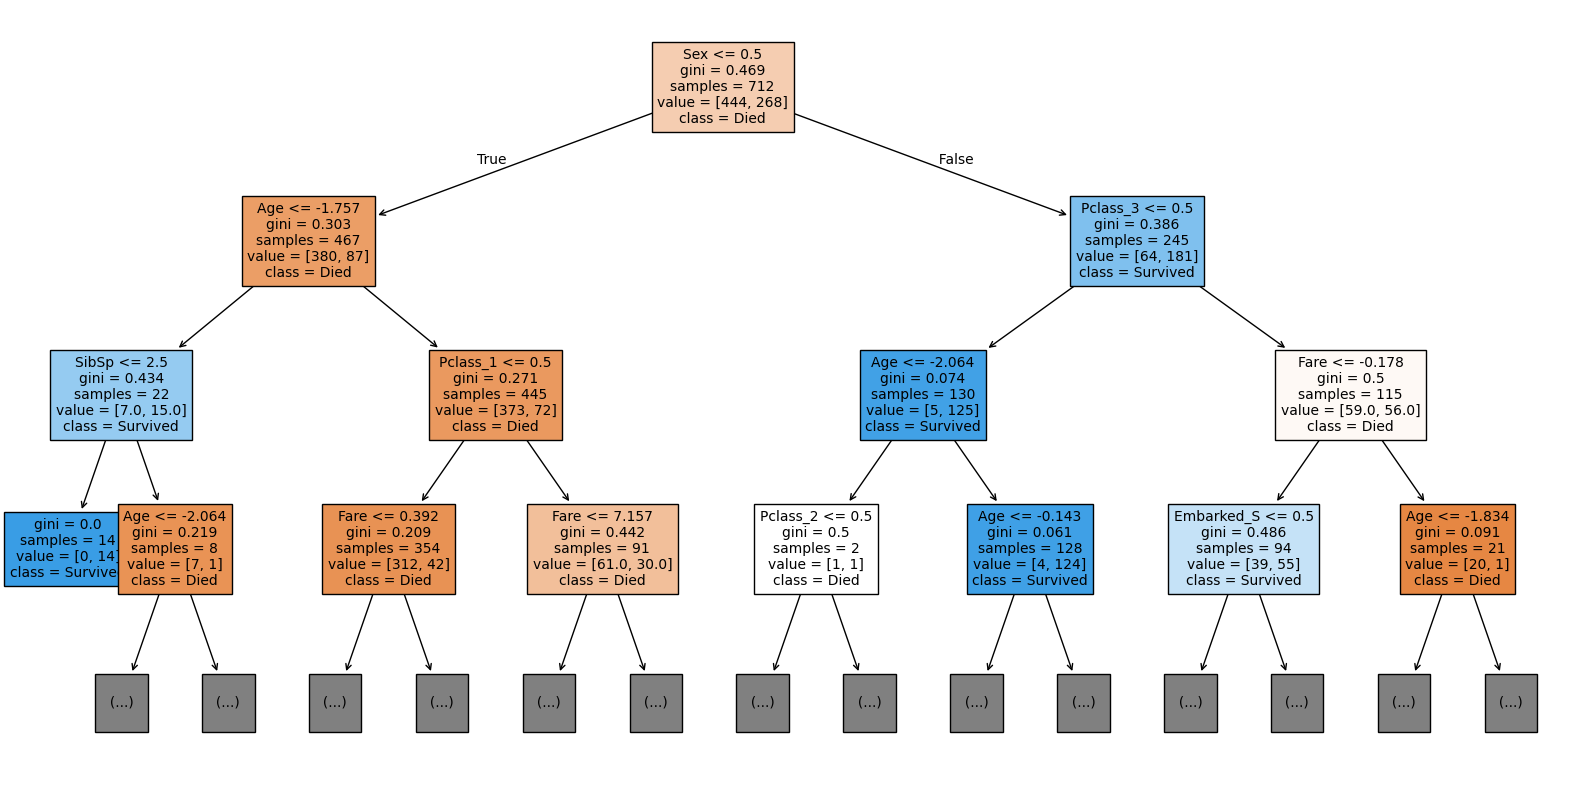

In [26]:
# --- Looking at the generatet Tree ---
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, 
          filled=True, 
          feature_names=X.columns,
          class_names=["Died", "Survived"],
          max_depth=3,
          fontsize=10)
plt.show()

In [27]:
# --- Upgrade to Random Forest ---
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train,y_train)
forest_prediction = forest_model.predict(X_test)

In [34]:
# --- Comparing // Random Forest ---
forest_accuracy = accuracy_score(y_test, forest_prediction)

print(f"Accuracy Decision Tree: {tree_accuracy:.2%}")
print(f"Accuracy Random Forest:  {forest_accuracy:.2%}")

Accuracy Decision Tree: 77.09%
Accuracy Random Forest:  81.56%


       Feature  Importance
4         Fare    0.262579
0          Sex    0.262472
1          Age    0.253186
10    Pclass_3    0.058257
2        SibSp    0.048784
3        Parch    0.036821
8     Pclass_1    0.022995
7   Embarked_S    0.018618
9     Pclass_2    0.016267
5   Embarked_C    0.012198
6   Embarked_Q    0.007824


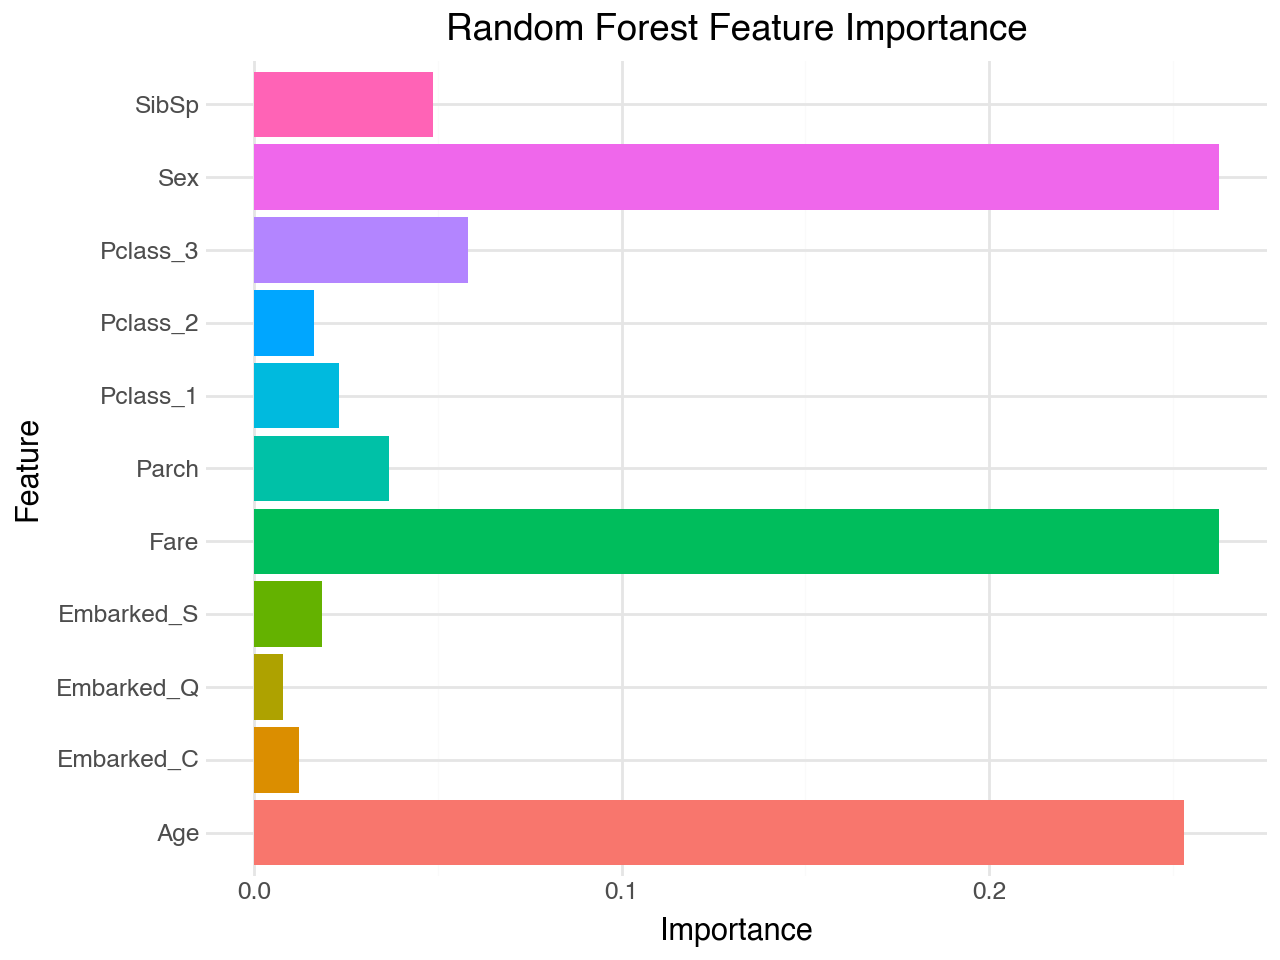

In [35]:
# --- Extracting Feature Importance ---
import plotnine as p9

# Create DataFrame for the plot
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': forest_model.feature_importances_
})

# Sort (so the most important feature is at the top)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display as table
print(importance_df)

# Plotting the graph
(p9.ggplot(importance_df, p9.aes(x='Feature', y='Importance', fill='Feature'))
 + p9.geom_col()
 + p9.coord_flip() # Flips the graph to make feature names readable
 + p9.labs(title="Random Forest Feature Importance", y="Importance", x="Feature")
 + p9.theme_minimal()
 + p9.theme(legend_position='none') # Hide legend, not needed here
)